In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [59]:
np.random.seed(0)
data = {
    'Uniform': np.random.uniform(0, 1, 1000),
    'Normal': np.random.normal(0, 1, 1000),
    'Left-Skewed': np.random.exponential(1, 1000) * -1 + 10,
    'Right-Skewed': np.random.exponential(1, 1000)
}

df = pd.DataFrame(data)

In [61]:
df = df.round(1)
df.head()

,Uniform,Normal,Left-Skewed,Right-Skewed
0,0.5,-0.1,8.9,0.3
1,0.7,0.0,8.4,0.1
2,0.6,1.8,8.9,0.7
3,0.5,-0.2,9.5,2.6
4,0.4,-0.5,9.9,1.0


In [62]:
for column in df.columns:
    df.loc[np.random.choice(df.index, size=100, replace=False), column] = np.nan

<Axes: xlabel='Uniform', ylabel='Count'>

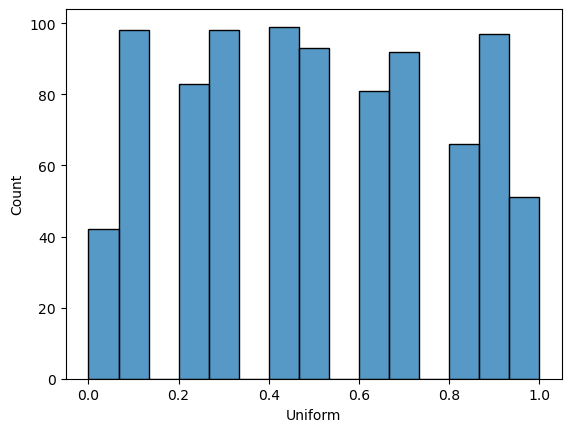

In [63]:
sns.histplot(df['Uniform'], bins=15)

<Axes: xlabel='Normal', ylabel='Count'>

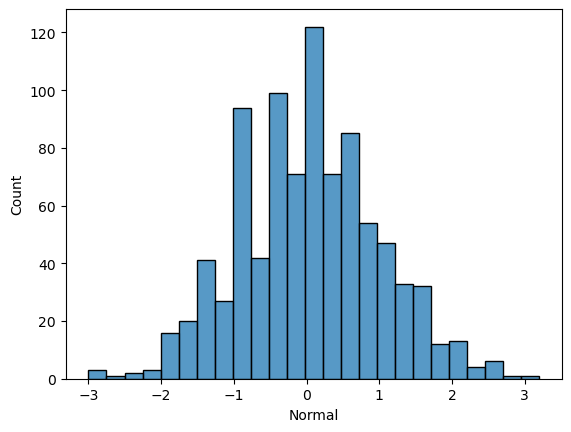

In [64]:
sns.histplot(df['Normal'], bins=25)

<Axes: xlabel='Left-Skewed', ylabel='Count'>

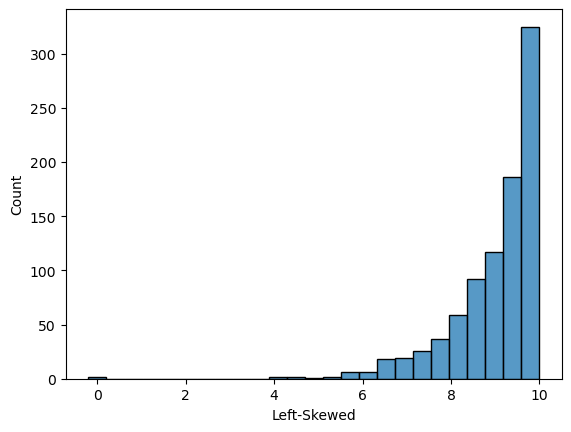

In [65]:
sns.histplot(df['Left-Skewed'], bins=25)

<Axes: xlabel='Right-Skewed', ylabel='Count'>

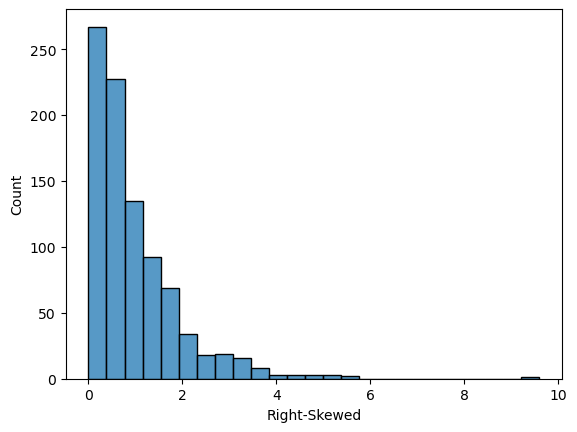

In [66]:
sns.histplot(df['Right-Skewed'], bins=25)

## OBSERVATIONS

#### i) Uniform distribution
This type of distribution has a regular rectangular or square histogram form which clearly indicates that the probability of selecting any value within a given range remains the same. Ex- Rolling of a die or tossing a coin.

#### ii) Normal distribution
This type of distribution has a histogram in which most of datapoints are concentrated in the middle. I think this distribution is also called gaussian distribution because that's why we had studied in our maths of uncertainity course in second semester. Ex- Weights, Heights of people.

#### iii) Left Skewed distribution
This distribution has a tail towards the left and a peak in the right which makes it to be called negative distribution. Also, since the tail towards the left is decreasing the mean, so mean < median in case of left-skewed distribution. Ex- Retirement age distribution of people like most people retire at a certain age but a few retire earlier.

#### iv) Right-Skewed distribution
This distribution has a tail towards the right and a peak in the left which makes it to be called positive distribution. Also, since the tail towards the right is increasing the mean, so mean > median in case of right-skewed distribution. Ex- Income distribution among people like most of the people earn a moderate amount but a few earn significantly more.

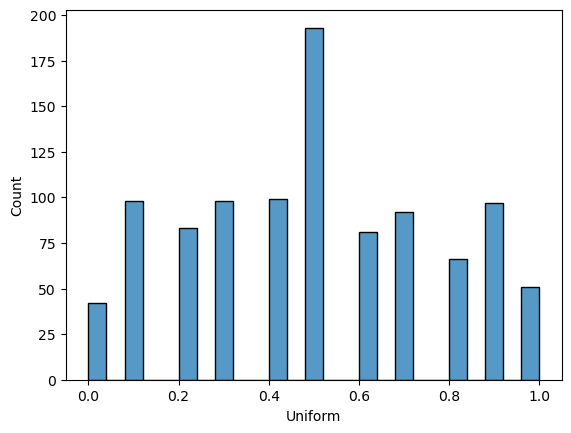

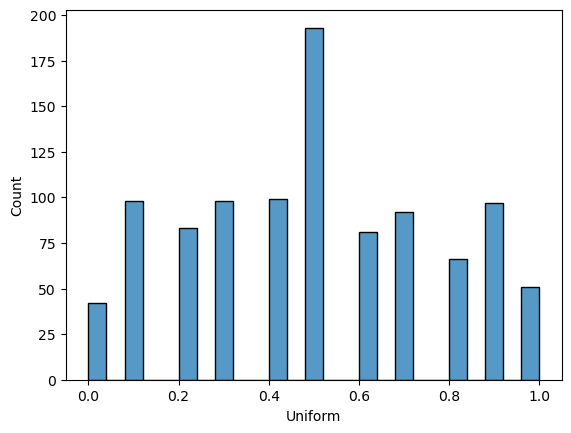

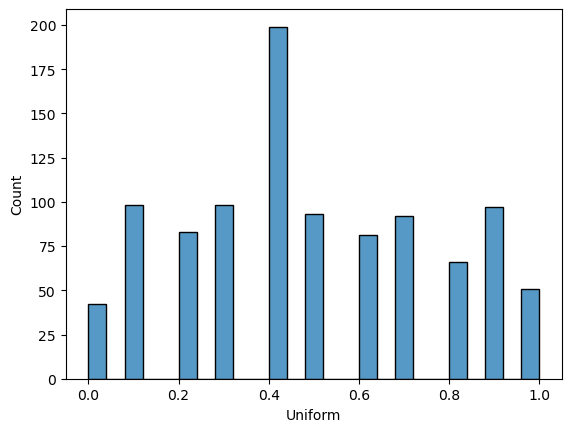

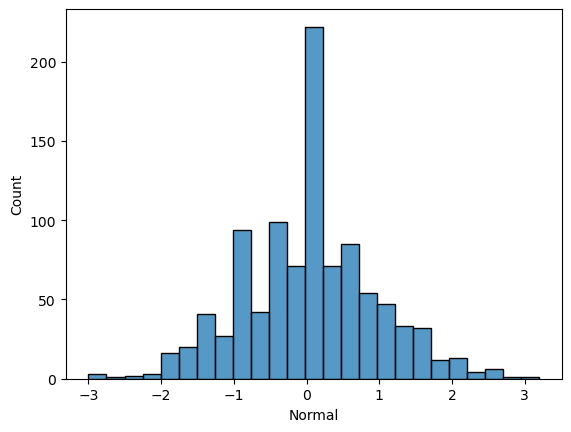

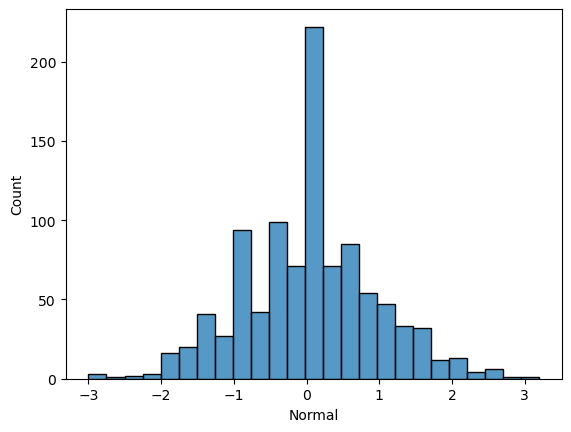

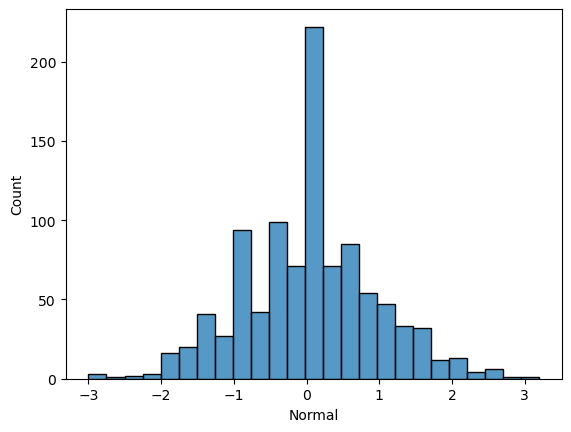

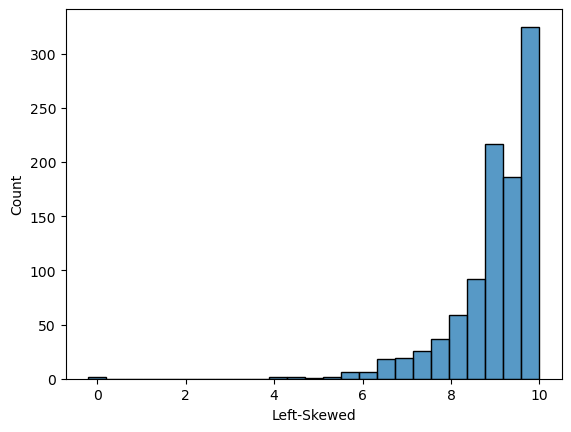

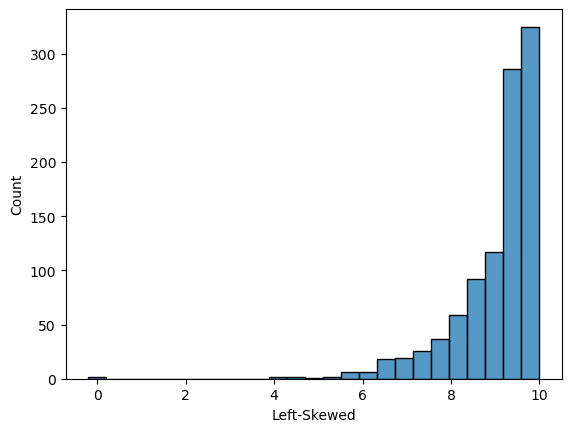

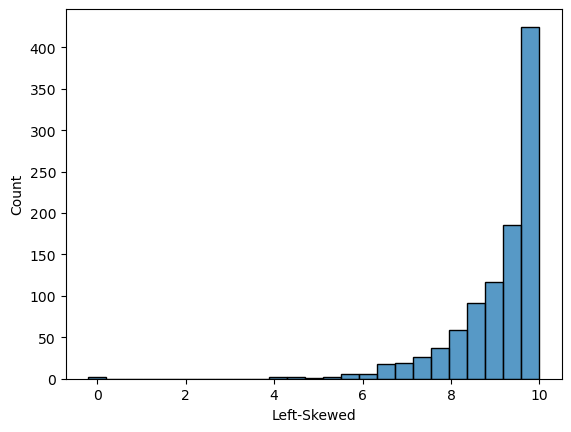

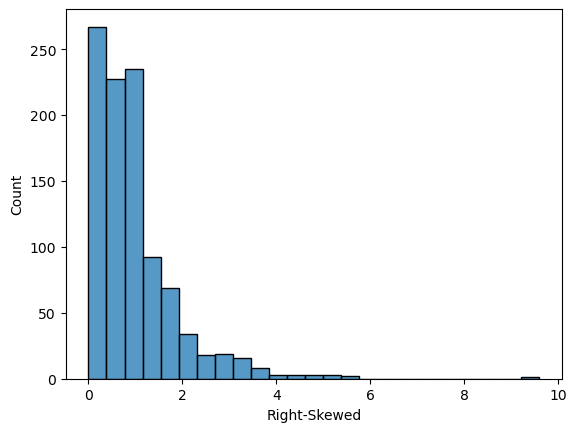

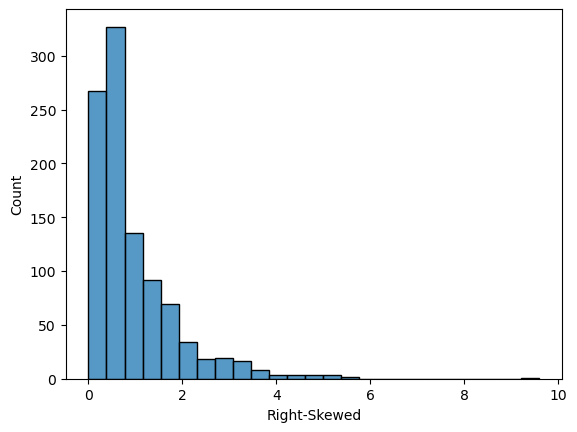

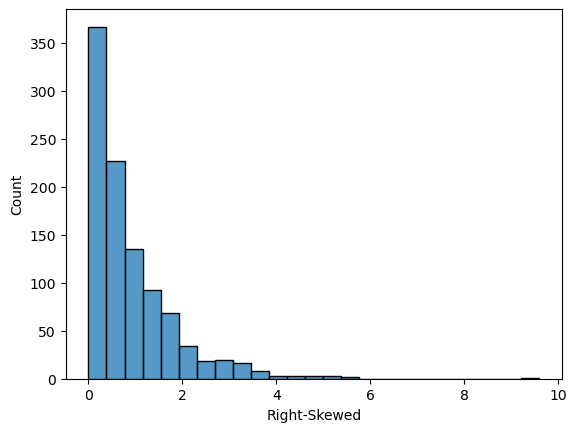

In [67]:
for column in df.columns:
    df_mean = df[column].fillna(df[column].mean())
    df_median = df[column].fillna(df[column].median())
    df_mode = df[column].fillna(df[column].mode()[0])
    
    sns.histplot(df_mean, bins=25)
    plt.show()
    
    sns.histplot(df_median, bins=25)
    plt.show()
    
    sns.histplot(df_mode, bins=25)
    plt.show()

In [68]:
def mean(col):
    tot = 0
    cnt = 0
    for val in col:
        if not np.isnan(val):
            tot += val
            cnt += 1
    return tot / cnt

In [69]:
def median(col):
    cols = sorted([val for val in col if not np.isnan(val)])
    n = len(cols)
    if n % 2 == 0:
        return (cols[n//2 - 1] + cols[n//2]) / 2
    else:
        return cols[n//2]

In [70]:
def mode(col):
    ls = list()
    for val in col:
        if not np.isnan(val):
            if val in ls:
                ls[val] += 1
            else:
                ls[val] = 1
    return max(ls, key=ls.get)

In [71]:
for column in df.columns:
    q1, q2, q3 = df[column].quantile([0.25, 0.5, 0.75])
    IQR = q3 - q1
    print("Column: ",column)
    print("Inter-Quartile Range: ",round(IQR,1))
    lower_fence = q1 - 1.5 * IQR
    print("Lower Fence: ",round(lower_fence,1))
    upper_fence = q3 + 1.5 * IQR
    print("Upper Fence: ",round(upper_fence,1))

Column:  Uniform
Inter-Quartile Range:  0.4
Lower Fence:  -0.3
Upper Fence:  1.3
Column:  Normal
Inter-Quartile Range:  1.3
Lower Fence:  -2.6
Upper Fence:  2.5
Column:  Left-Skewed
Inter-Quartile Range:  1.1
Lower Fence:  7.0
Upper Fence:  11.3
Column:  Right-Skewed
Inter-Quartile Range:  1.0
Lower Fence:  -1.2
Upper Fence:  2.8
